In [5]:
import pandas as pd
import numpy as np
import datetime as dt

In [9]:
data = pd.read_csv("./real_fake/Data_short.csv", parse_dates=['date'])

In [7]:
data['subject'].unique()

array(['politicsNews', 'worldnews'], dtype=object)

<Axes: >

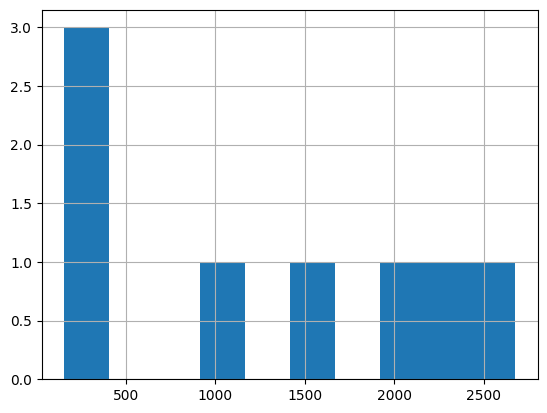

In [106]:
data[['subject', 'is_true']].value_counts().hist()